In [82]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


image = cv2.imread('drive/My Drive/line/test_image.jpg')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def Canny(image):
  lene_image = np.copy(image)
  gray = cv2.cvtColor(lene_image,cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gray,(5, 5), 0)
  canny = cv2.Canny(blur, 50, 150)
  return canny

In [0]:
def display_lines(image, lines):
  line_image = np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1, y1, x2, y2 = line.reshape(4)
      cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
      return line_image 

In [0]:
def regin_of_interest(image):
  height = image.shape[0]
  polygons = np.array([
      [(200, height), (1100, height), ( 550, 250)]
  ])
  mask = np.zeros_like(image)
  cv2.fillPoly(mask, polygons, 255)
  masked_image = cv2.bitwise_and(image, mask)
 # cv2_imshow(mask)
  return masked_image

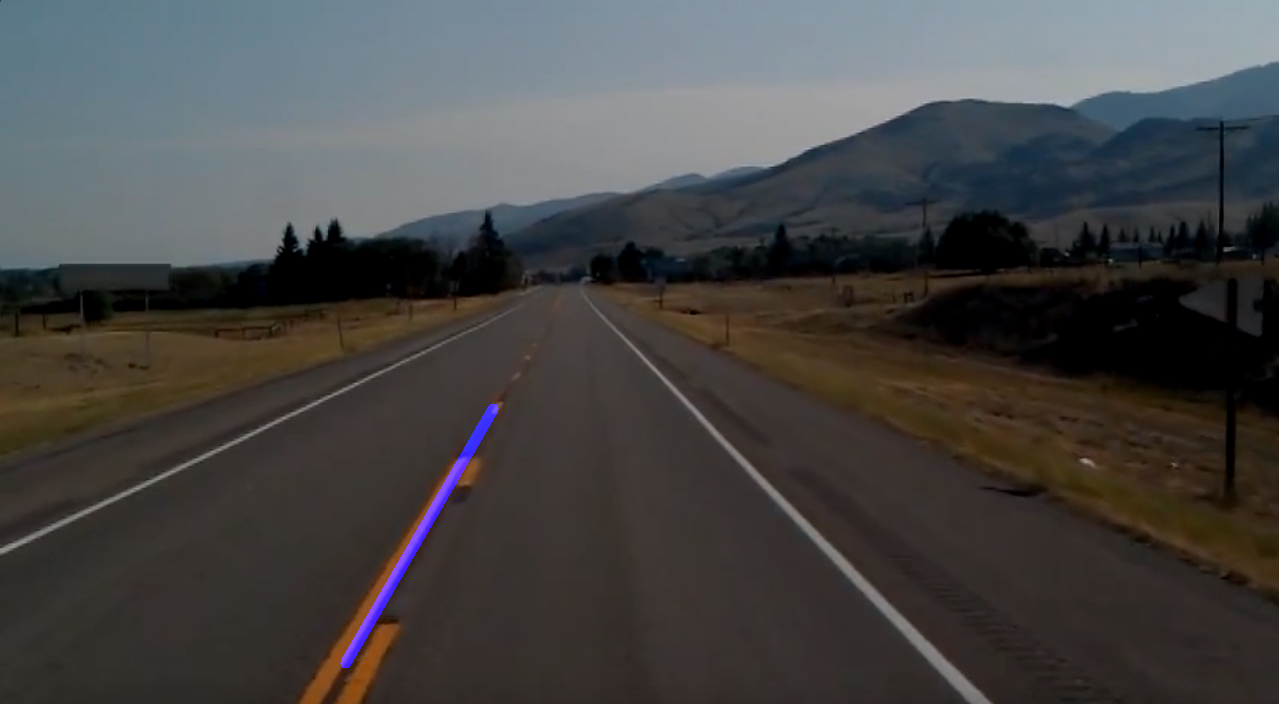

In [305]:
canny = Canny(image)
cropped_image = regin_of_interest(canny)
lines = cv2.HoughLinesP(cropped_image,3 , 3.14/180,4 , np.array([]), minLineLength=5, maxLineGap=100)
line_image = display_lines(np.copy(image), lines)
combo_image = cv2.addWeighted(np.copy(image),.8 , line_image, 20,-20)
cv2_imshow(combo_image)

In [0]:
cv2_imshow(combo_image)